## 3. Global Navigation
<span style="color: red; font-size: 24px;font-weight: bold;">Replace the url of the images by good ones.</span>

The goal of this section is to make the robot follow the desired path with the help of a controller. We compare two type of conroller :
- A *PD controller* 
- An *Astolfi controller*


### 3.1 PD coontroler

**proportional-derivative (PD) controller** is a type of feedback control system commonly used i control theory. It has two main components: *proportional (P) control* and *derivative (D) control*. 


The equation for a PD controller :  
$$c(t) = K_c(e(t) + T_d \frac{de}{dt}) + C$$


Therefore we defined a class **PD_controller** that contains : 
-  Initalisation : P (constant of proportionality of error signal), D (constant of proportionality of derivative of the error signal), time_step.
-  A control method that take the error and the previous error to calculate the controller output. 

### 3.2 Astolfi controller

To smoothly modulate the forward and rotational velocities, we can use an **Astolfi controller**.


<div style="text-align: center;">
  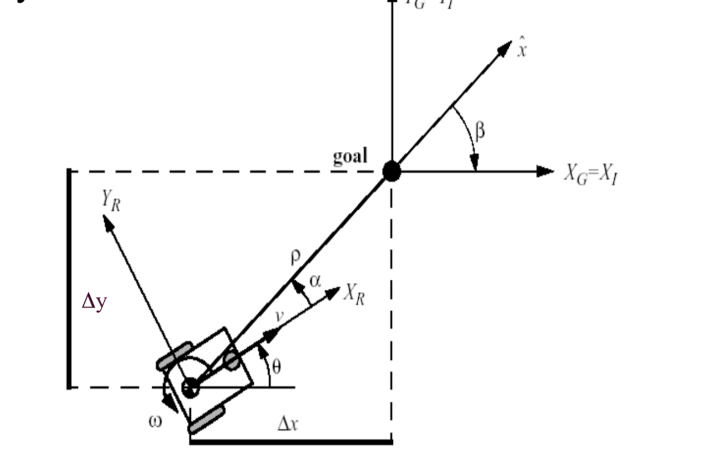
  <p style="text-align: center;">Image 3.2.1: Polar and global coordinates of the Thymio</p>
</div>


As shown in the figure above (<a href="#img_3.2.1">Image 3.2.1</a>), we can define the global coordinates of the robots by using his local coordinates by using those equations : 
<div style="text-align: center;">
  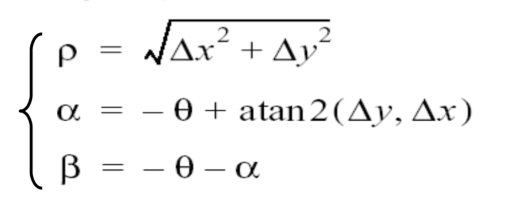
  <p style="text-align: center;">Image 3.2.2: Equations for polar coordinates</p>
</div>


The target is $\alpha,\rho,\beta$ to be equal to (0,0,0).

With this last set of equations, we can output the linear and angular velocities for the Thymio : 

<div style="text-align: center;">
  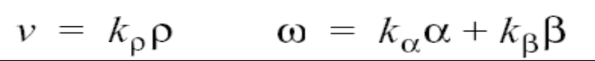
  <p style="text-align: center;">Image 3.2.3: Your Caption Here</p>
</div>


In our code this is all achived in the **astolfi_controller** class. We have :
- The initialisation method defined $k_{\rho}, k_{\alpha}, k_{\beta}$
- The **_calculate_parameter** method calculate $\rho,\alpha, \beta$ with the help of the goal and the postion of the robot.
- The **control** method use the **_calculate_parameter** method to return the linear and angular velocities $(v, \omega)$



### 3.3 Other functions for the navigation

Many functions were develloped to implement the navigation part. Here is a recap of what those functions are doing and how they are used by the controller class : 
- the **euclidean_distance** function calculate the distance between two points (x1​,y1​) and (x2,y2) : $\text{distance} = \sqrt{{(x_2 - x_1)^2 + (y_2 - y_1)^2}}$
- The **vector** function calculates the vector between two points, denoted as the start point $(x_1, y_1)$ and the end point $(x_2, y_2)$. It returns a 2-dimensional vector represented as a list: $\text{{vector}} = [x_2 - x_1, y_2 - y_1]$.
- The **calculate_centroid** function computes the centroid of the four corners of an aruco marker. The coordinates are represented as a matrix containing x and y coordinates for every corner. The function iterates through each coordinate and calculates the average of the x-coordinates and y-coordinates. The resulting centroid is returned as a 2-dimensional vector, represented as a list: $\text{{centroid}} = [(x_{\text{{center}}}),(y_{\text{{center}}})]$, where $x_{\text{{center}}} = \frac{x_1 + x_2 + x_3 + x_4}{4}$ and $y_{\text{{center}}} = \frac{y_1 + y_2 + y_3 + y_4}{4}$. The $x_{\text{{center}}}$ and $y_{\text{{center}}}$ are represented as an integer because we are working with pixels so we cannot use floating point numbers.
- The **calculate_orientation** function determines the orientation vector for a robot marker based on the coordinates of its two top corners. The function calculates the middle point between the two top corners to obtain the end point of the orientation vector: $((x_{\text{end}}, y_{\text{end}})$ = $\left(\frac{x_1 + x_2}{2}, \frac{y_1 + y_2}{2}\right)$. It then computes the orientation vector by subtracting the centroid point, obtained using the **calculate_centroid** function, from the end point using the **vector function**.




